# Project Header

*Student's name*

---

## Project description

text

In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score

warnings.filterwarnings('ignore')

# Loading the data

In [2]:
DATA = pd.read_csv('./data.csv', index_col=0).iloc[:,:-1]
X = DATA.iloc[:,1:]
Y = DATA.diagnosis

DATA

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


# Data Visualization / Analysis

Unique y-values ['M' 'B']


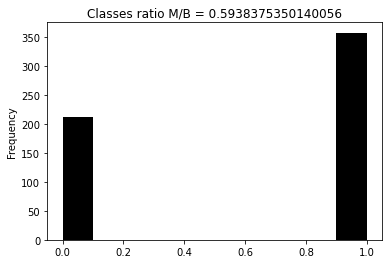

In [3]:
print('Unique y-values', Y.unique())

#Encode M and B classes by 0 and 1 values
try: 
    Y.replace(['M','B'], [0,1], inplace=True) 
except: 
    pass

Y.plot(kind='hist', color='black', title='Classes ratio M/B = {}'.format(Y[Y==0].count()/Y[Y==1].count()));

That is, objective feature Y is not well-balanced (ratio should be close to 1). We need to balance it by augmenting the dataset or cutting objects corresponding to B class.

# BALANCE DATASET!!!!!!!!!

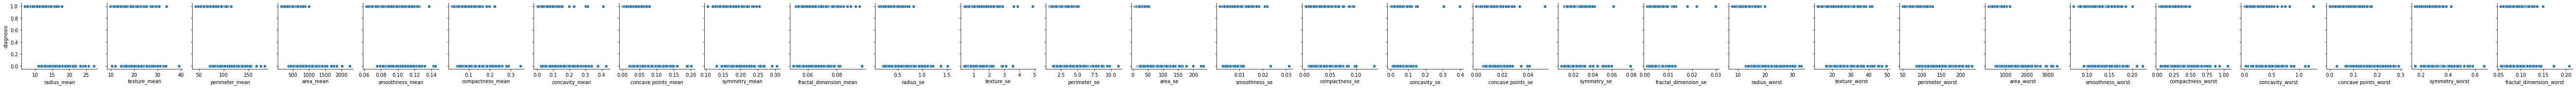

In [4]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size=0.2, shuffle=True)

TRAIN = pd.concat([X_TRAIN,Y_TRAIN], axis=1)
#now we work only with train sets, we are not able to sneak what happends in test sets
sns.pairplot(TRAIN, y_vars='diagnosis', x_vars=X_TRAIN.columns.values);

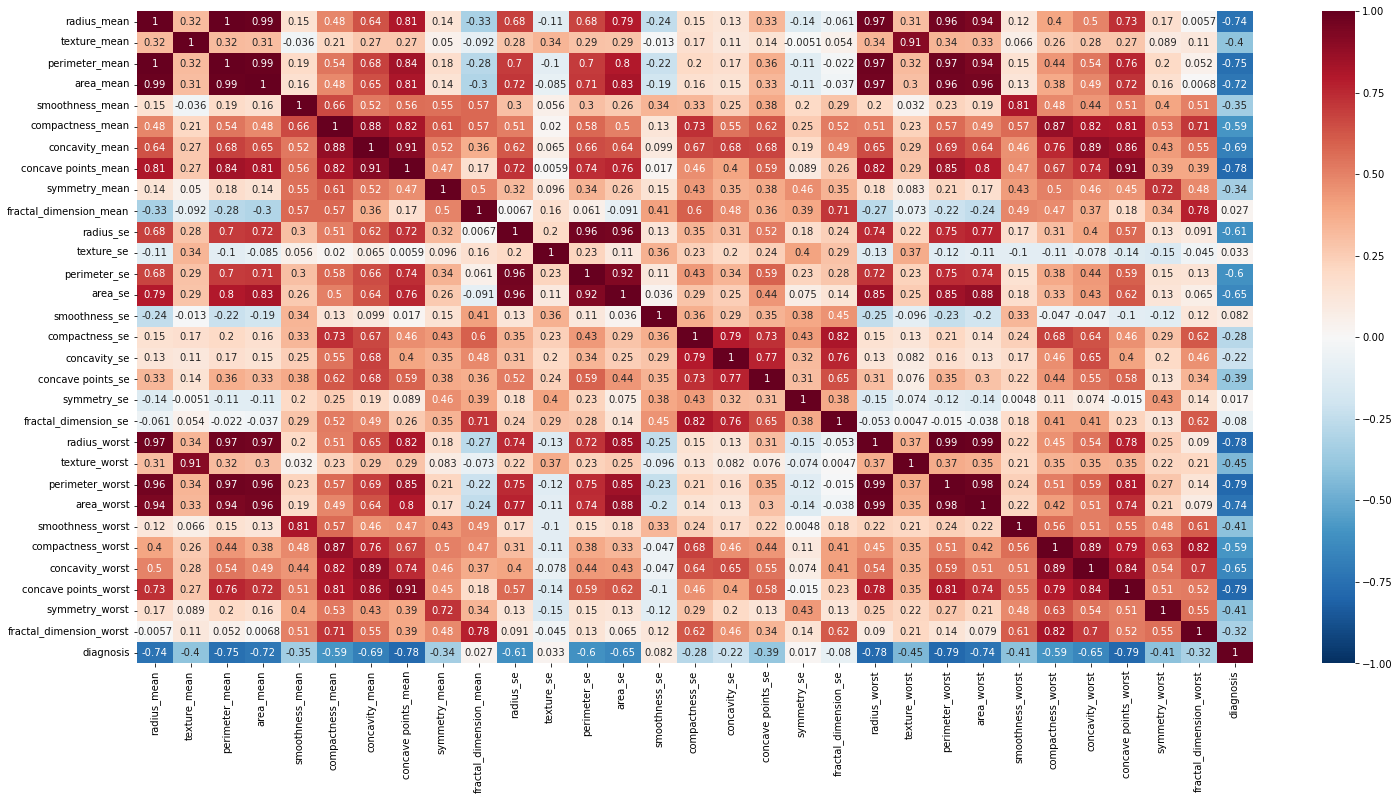

In [5]:
plt.figure(figsize=(25,12))
sns.heatmap(TRAIN.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

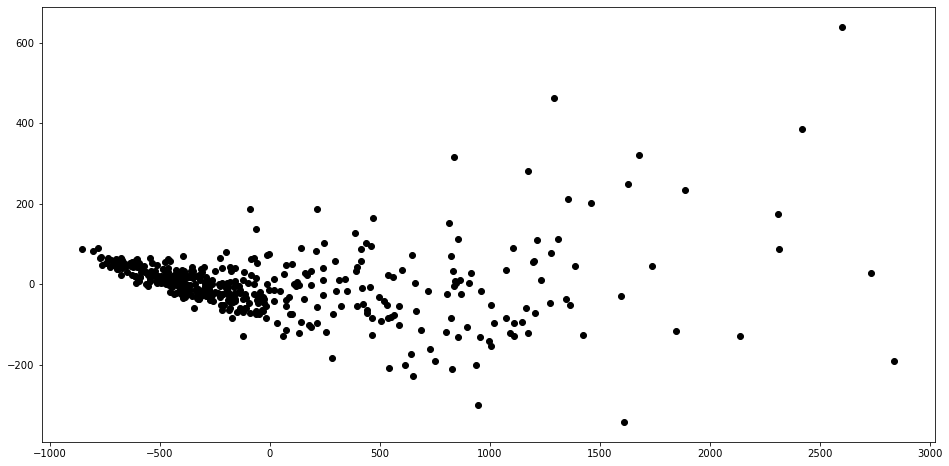

In [6]:
pca_2 = PCA(n_components=2)
X_TRAIN_PCA_2 = pca_2.fit_transform(X_TRAIN, Y_TRAIN)

plt.figure(figsize=(16,8))
plt.scatter(X_TRAIN_PCA_2[:,0], X_TRAIN_PCA_2[:,1], color='black', marker='o');

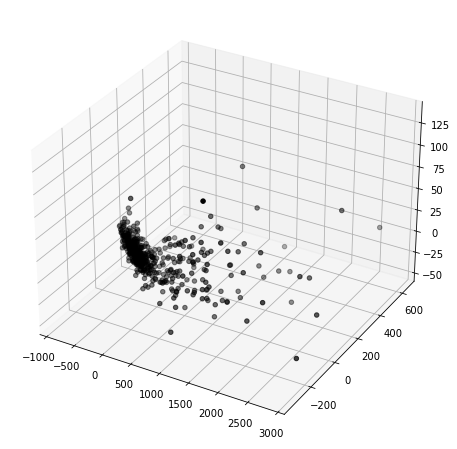

In [7]:
pca_3 = PCA(n_components=3)
X_TRAIN_PCA_3 = pca_3.fit_transform(X_TRAIN, Y_TRAIN)

plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
ax.scatter(X_TRAIN_PCA_3[:,0], X_TRAIN_PCA_3[:,1], X_TRAIN_PCA_3[:,2], color='black', marker='o');

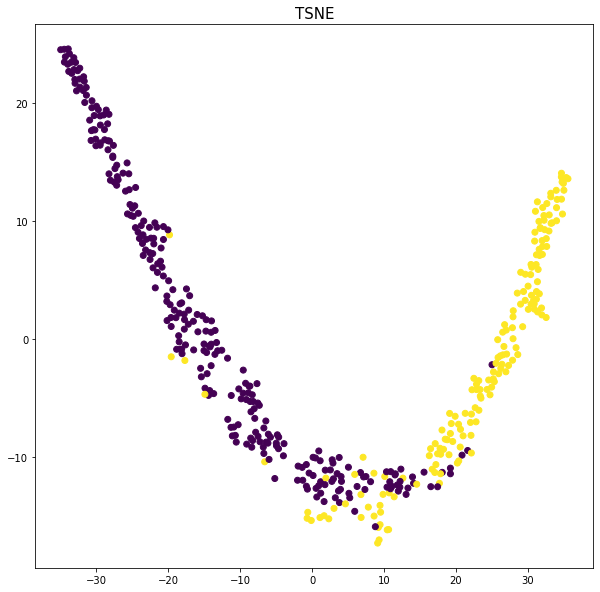

In [8]:
tsne2 = TSNE(random_state=0)
PIC2 = tsne2.fit_transform(TRAIN)

fig = plt.figure(figsize=(10,10))
plt.scatter(PIC2[:, 0], PIC2[:, 1], c=TRAIN.diagnosis<1)
plt.title('TSNE', size=15);

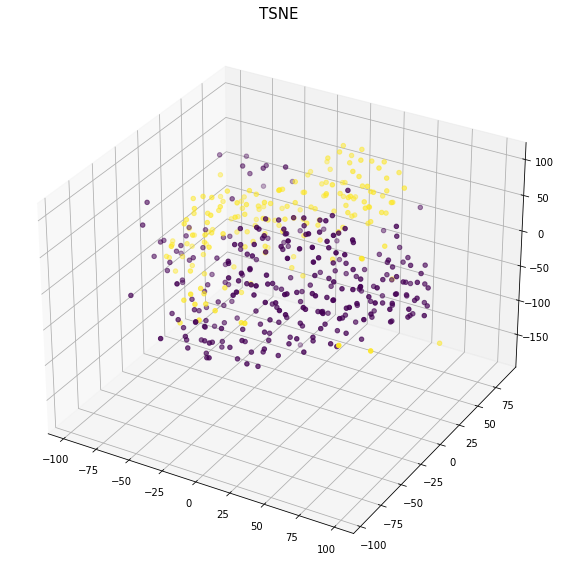

In [9]:
tsne3 = TSNE(n_components=3, random_state=0)
PIC3 = tsne3.fit_transform(TRAIN)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(PIC3[:, 0], PIC3[:, 1], PIC3[:, 2], c=TRAIN.diagnosis<1)
plt.title('TSNE', size=15);

# Baseline accuracy

In [10]:
#Preparing function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

LogisticRegression Confusion Matrix


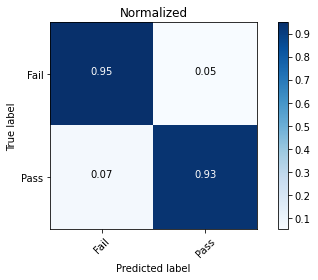

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.938596,0.952381,0.972222,0.933333,"[[37, 2], [5, 70]]",0.941026


In [14]:
#Fitting, predicting and scoring classificator's pool
MODELS = [LogisticRegression()]
RESULT = []

for k,classificator in enumerate(MODELS):
    classificator.fit(X_TRAIN, Y_TRAIN)
    RESULT.append({'Classificator' : classificator.__class__.__name__,
                  'Accuracy' : accuracy_score(Y_TEST, classificator.predict(X_TEST)),
                  'F1' : f1_score(Y_TEST, classificator.predict(X_TEST)),
                  'Precision' : precision_score(Y_TEST, classificator.predict(X_TEST)),
                  'Recall' : recall_score(Y_TEST, classificator.predict(X_TEST)),
                  'Confusion Matrix' : confusion_matrix(Y_TEST, classificator.predict(X_TEST)),
                  'ROC AUC' : roc_auc_score(Y_TEST, classificator.predict(X_TEST))})
    
    print(RESULT[k]['Classificator']+' Confusion Matrix')
    plot_confusion_matrix(RESULT[k]['Confusion Matrix'], classes=['Fail', 'Pass'], normalize=True, title='Normalized')
    plt.show()
    
RESULT = pd.DataFrame(RESULT).set_index('Classificator')
RESULT

# Data Preprocessing

# Feature Engineering

# Experiments

# Conclusion